# Fetch and Extract Stock Datasets

This notebook shows how to use the https://github.com/AlgoTraders/stock-analysis-engine repository to fetch and extract stock datasets from various sources. Once collected, the datasets are cached in Redis and archived in Minio (S3).

Run this notebook to fetch, extract and plot stock datasets for Netflix **NFLX**.

## Fetch Datsets

In [1]:
ticker = 'NFLX'

In [2]:
# fetch all datasets for the ticker
from analysis_engine.fetch import fetch
fetch_datasets = fetch(ticker=ticker)

## Extract Datasets

In [3]:
from analysis_engine.extract import extract
datasets = extract(ticker=ticker)

extracted NFLX dataset with name: daily
extracted NFLX dataset with name: minute


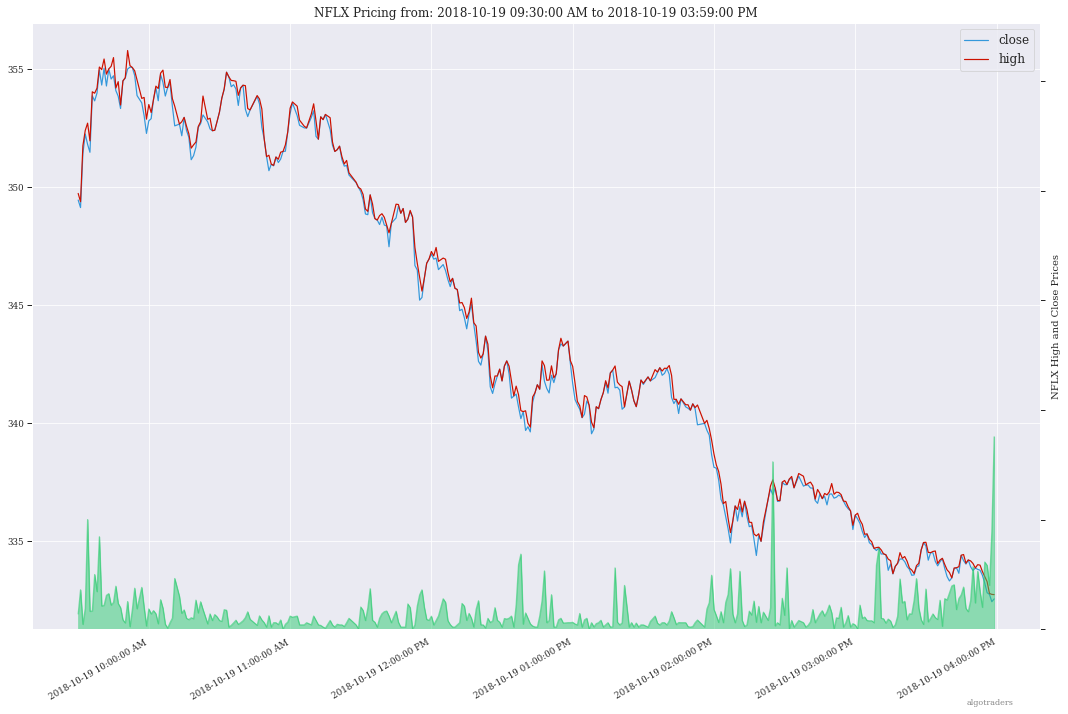

extracted NFLX dataset with name: quote
extracted NFLX dataset with name: stats
extracted NFLX dataset with name: peers
extracted NFLX dataset with name: news1
extracted NFLX dataset with name: financials
extracted NFLX dataset with name: earnings
extracted NFLX dataset with name: dividends
extracted NFLX dataset with name: company
extracted NFLX dataset with name: calls
extracted NFLX dataset with name: puts
extracted NFLX dataset with name: pricing
extracted NFLX dataset with name: news


In [4]:
import analysis_engine.charts as ae_charts
from analysis_engine.consts import IEX_MINUTE_DATE_FORMAT
for dataset_name in datasets[ticker]:
    print('extracted {} dataset with name: {}'.format(ticker, dataset_name))
    if dataset_name == 'minute':
        minute_df = datasets[ticker][dataset_name]
        image_res = ae_charts.plot_overlay_pricing_and_volume(
            log_label='intro-nb-{}'.format(ticker),
            ticker=ticker,
            date_format=IEX_MINUTE_DATE_FORMAT,
            df=minute_df,
            show_plot=True)
# note: re-run this block if it shows something like:
# <Figure size 1500x1000 with 2 Axes> instead of a pricing chart

**Fetch also returns the collected datasets for all tickers**

In [5]:
for dataset_name in fetch_datasets[ticker]:
    print('fetch for {} created a dataset with name: {}'.format(ticker, dataset_name))

fetch for NFLX created a dataset with name: daily
fetch for NFLX created a dataset with name: minute
fetch for NFLX created a dataset with name: quote
fetch for NFLX created a dataset with name: stats
fetch for NFLX created a dataset with name: peers
fetch for NFLX created a dataset with name: news1
fetch for NFLX created a dataset with name: financials
fetch for NFLX created a dataset with name: earnings
fetch for NFLX created a dataset with name: dividends
fetch for NFLX created a dataset with name: company
fetch for NFLX created a dataset with name: calls
fetch for NFLX created a dataset with name: puts
fetch for NFLX created a dataset with name: pricing
fetch for NFLX created a dataset with name: news


## Advanced Developer Usage - Manually Extracting NFLX Datasets

If you want to develop your own algorithms, you may need to extract datasets after they have been fetched and collected with the library's API. For background, the engine and library will automatically cache and archive datasets in Minio (S3).

### Verify Datasets are in Redis

These commands assume you have the [redis client installed](https://redis.io/download):

```
redis-cli
127.0.0.1:6379> select 4
OK
127.0.0.1:6379[4]> keys *
 1) "NFLX_2018-10-19_company"
 2) "NFLX_2018-10-19_financials"
 3) "NFLX_2018-10-19_peers"
 4) "NFLX_2018-10-19_news"
 5) "NFLX_2018-10-19_quote"
 6) "NFLX_2018-10-19"
 7) "NFLX_2018-10-19_news1"
 8) "NFLX_2018-10-19_earnings"
 9) "NFLX_2018-10-19_stats"
10) "NFLX_2018-10-19_daily"
11) "NFLX_2018-10-19_dividends"
12) "NFLX_2018-10-19_minute"
13) "NFLX_2018-10-19_options"
14) "NFLX_2018-10-19_pricing"
127.0.0.1:6379[4]>
```

### Verify Datasets are in Minio

You can view the datasets in Minio (S3) by browsing to:

http://localhost:9000/minio/

### Create Imports and Logger

In [6]:
import datetime
from IPython.display import display
from IPython.display import HTML
from analysis_engine.api_requests import get_ds_dict
from analysis_engine.consts import SUCCESS
from analysis_engine.consts import ppj
from analysis_engine.consts import IEX_DAILY_DATE_FORMAT
from analysis_engine.consts import IEX_TICK_DATE_FORMAT
from analysis_engine.utils import utc_now_str
from analysis_engine.utils import get_last_close_str
from spylunking.log.setup_logging import build_colorized_logger
from analysis_engine.extract import extract

log_label = 'intro-ds-1'
log = build_colorized_logger(name=log_label, handler_name='jupyter')

### Select a Ticker and Date

In [7]:
today_str = utc_now_str()
last_close_str = get_last_close_str()

log.info('Using ticker={} with last close={}'.format(ticker, last_close_str))

### Load Cache Keys

In [8]:
cache_dict = get_ds_dict(ticker=ticker, label=log_label)
log.info('Cache keys for ticker={} and last close={} cache_dict={}'.format(ticker, last_close_str, ppj(cache_dict)))

### Extracting Minute Cache

In [9]:
from analysis_engine.iex.extract_df_from_redis import extract_minute_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, minute_df = extract_minute_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

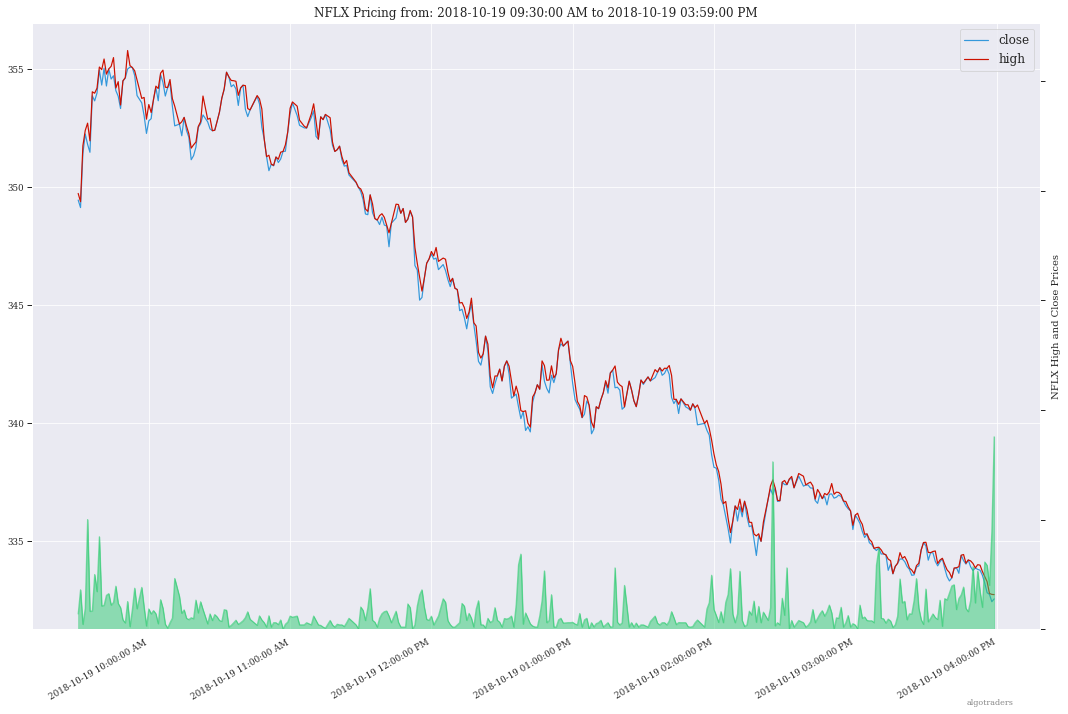

In [10]:
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_MINUTE_DATE_FORMAT,
        df=minute_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['minute']))

### Extracting IEX Quote Cache

In [11]:
from analysis_engine.iex.extract_df_from_redis import extract_quote_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, quote_df = extract_quote_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [12]:
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    display(quote_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['quote']))

,avgTotalVolume,calculationPrice,change,changePercent,close,closeTime,close_time,companyName,date,delayedPrice,...,open,openTime,open_time,peRatio,previousClose,primaryExchange,sector,week52High,week52Low,ytdChange
0,11383247,close,-14.04,-0.04049,332.67,2018-10-19T20:00:00.585Z,2018-10-19 20:00:00.585,Netflix Inc.,2018-10-19,332.67,...,349.36,2018-10-19T13:30:00.731Z,2018-10-19 13:30:00.731,119.24,346.71,Nasdaq Global Select,Consumer Cyclical,423.2056,178.38,0.614008


### Extracting Daily Cache

In [13]:
from analysis_engine.iex.extract_df_from_redis import extract_daily_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, daily_df = extract_daily_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

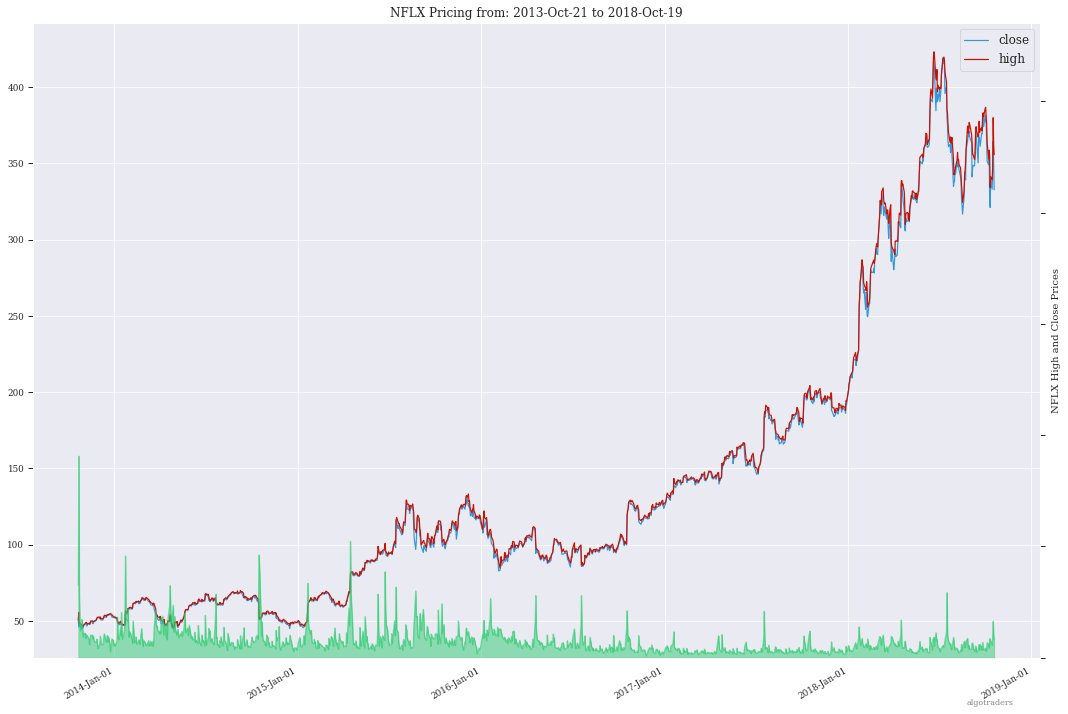

In [14]:
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_DAILY_DATE_FORMAT,
        df=daily_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['daily']))

### Extracting Stats Cache

In [15]:
from analysis_engine.iex.extract_df_from_redis import extract_stats_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, stats_df = extract_stats_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [16]:
if extract_status == SUCCESS:
    display(stats_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['stats']))

,EBITDA,EPSSurpriseDollar,EPSSurprisePercent,beta,cash,companyName,consensusEPS,day200MovingAvg,day30ChangePercent,day50MovingAvg,...,shortInterest,shortRatio,ttmEPS,week52change,week52high,week52low,year1ChangePercent,year2ChangePercent,year5ChangePercent,ytdChangePercent
0,149222000,NaN,30.8824,1.050323,2822795000,Netflix Inc.,0.68,328.7879,-0.045177,353.8804,...,16396960,1.82,2.79,70.4863,423.2056,178.38,0.713381,1.69696,5.559882,0.654498


### Extracting Peers Cache

In [17]:
from analysis_engine.iex.extract_df_from_redis import extract_peers_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, peers_df = extract_peers_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [18]:
if extract_status == SUCCESS:
    display(peers_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['peers']))

,peer
0,BCE
1,AMZN
2,CMCSA
3,DISH
4,DIS
5,P
6,VIAB
7,FOXA


### Extracting News from IEX Cache

In [19]:
from analysis_engine.iex.extract_df_from_redis import extract_news_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, news_iex_df = extract_news_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [20]:
if extract_status == SUCCESS:
    display(news_iex_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['news1']))

,headline,image,related,source,summary,url
0,Netflix's biggest daredevil move could be maki...,https://api.iextrading.com/1.0/stock/nflx/news...,"DIS,NFLX,SNE,T",CNBC,No summary available.,https://api.iextrading.com/1.0/stock/nflx/arti...
1,QQQ: The Netflix Effect,https://api.iextrading.com/1.0/stock/nflx/news...,"AMZN,CON102,MU,NASDAQ01,NFLX,QQQ,RET10217,SPEC...",SeekingAlpha,Share values for the Invesco QQQ ETF ( QQQ ...,https://api.iextrading.com/1.0/stock/nflx/arti...


### Extracting Financials Cache

In [21]:
from analysis_engine.iex.extract_df_from_redis import extract_financials_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, financials_df = extract_financials_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [22]:
if extract_status == SUCCESS:
    display(financials_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['financials']))

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
0,-829868000,-690411000,2412346000,8729981000,3078564000,NaN,1587028000,402835000,1106360000,-7670000,480668000,3999374000,327026000,5009653000,NFLX,23366229000,3067534000,NaN,NaN,3999374000
1,1350857000,-518239000,2289867000,9346889000,3913994000,NaN,1617403000,384349000,1155190000,-85410000,462213000,3907270000,317213000,4496600000,NFLX,22663537000,3906357000,NaN,NaN,3907270000
2,-230495000,-236757000,2196075000,7817576000,2599477000,NaN,1504781000,290124000,1058203000,41080000,446578000,3700856000,300730000,4020730000,NFLX,20152797000,2593666000,NaN,NaN,3700856000
3,1074145000,-487957000,2107354000,7669974000,2822795000,NaN,1178401000,185517000,933098000,25740000,245303000,3285755000,273351000,3581956000,NFLX,19012742000,2822795000,NaN,NaN,3285755000


### Extracting Earnings Cache

In [23]:
from analysis_engine.iex.extract_df_from_redis import extract_earnings_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, earnings_df = extract_earnings_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [24]:
if extract_status == SUCCESS:
    display(earnings_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['earnings']))

,EPSSurpriseDollar,actualEPS,announceTime,consensusEPS,estimatedChangePercent,estimatedEPS,fiscalEndDate,fiscalPeriod,numberOfEstimates,symbol,symbolId,yearAgo,yearAgoChangePercent
0,0.21,0.89,AMC,0.68,1.344828,0.68,2018-09-30T00:00:00.000Z,Q3 2018,14,NFLX,4784,0.29,2.068966
1,0.05,0.85,AMC,0.80,4.333333,0.80,2018-06-30T00:00:00.000Z,Q2 2018,19,NFLX,4784,0.15,4.666667
2,0.01,0.64,AMC,0.63,0.575000,0.63,2018-03-31T00:00:00.000Z,Q1 2018,16,NFLX,4784,0.40,0.600000
3,NaN,0.41,AMC,0.41,1.733333,0.41,2017-12-31T00:00:00.000Z,Q4 2017,16,NFLX,4784,0.15,1.733333


### Extracting Dividends Cache

In [25]:
from analysis_engine.iex.extract_df_from_redis import extract_dividends_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, dividends_df = extract_dividends_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [26]:
if extract_status == SUCCESS:
    display(dividends_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['dividends']))

""


### Extracting Company Cache

In [27]:
from analysis_engine.iex.extract_df_from_redis import extract_company_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, company_df = extract_company_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [28]:
if extract_status == SUCCESS:
    display(company_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['company']))

,CEO,companyName,description,exchange,industry,issueType,sector,tags,website
0,Reed Hastings,Netflix Inc.,Netflix Inc provides multimedia content throug...,Nasdaq Global Select,Entertainment,cs,Consumer Cyclical,"[Consumer Cyclical, Media - Diversified, Enter...",http://www.netflix.com


### Extracting Option Calls Cache

In [29]:
from analysis_engine.yahoo.extract_df_from_redis import extract_option_calls_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, option_calls_df = extract_option_calls_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [30]:
if extract_status == SUCCESS:
    display(option_calls_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['options']))

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,109.10,108.05,-5.550003,REGULAR,NFLX181116C00225000,USD,1542326400,0.793947,True,130.00,1539959582,11,-4.094432,225,8
1,112.55,110.40,0.000000,REGULAR,NFLX181116C00230000,USD,1542326400,1.353763,True,122.08,1537214332,2,0.000000,230,1
2,99.30,98.00,-15.650002,REGULAR,NFLX181116C00235000,USD,1542326400,0.729251,True,111.75,1539964516,7,-12.284145,235,1
3,94.45,93.15,0.000000,REGULAR,NFLX181116C00240000,USD,1542326400,0.711673,True,122.45,1539803206,20,0.000000,240,2
4,89.75,88.30,0.000000,REGULAR,NFLX181116C00245000,USD,1542326400,0.700198,True,104.80,1539879100,6,0.000000,245,1
5,84.85,83.75,-11.400002,REGULAR,NFLX181116C00250000,USD,1542326400,0.689945,True,89.60,1539972054,30,-11.287130,250,38
6,80.10,78.80,0.000000,REGULAR,NFLX181116C00255000,USD,1542326400,0.664798,True,82.62,1539622122,24,0.000000,255,6
7,75.35,74.05,-12.500000,REGULAR,NFLX181116C00260000,USD,1542326400,0.646488,True,87.85,1539965323,61,-12.456403,260,1
8,70.65,69.35,-2.150002,REGULAR,NFLX181116C00265000,USD,1542326400,0.629398,True,70.65,1539976510,14,-2.953299,265,1
9,65.95,64.75,-27.860000,REGULAR,NFLX181116C00270000,USD,1542326400,0.612919,True,73.56,1539969611,35,-27.469927,270,1


### Extracting Option Puts Cache

In [31]:
from analysis_engine.yahoo.extract_df_from_redis import extract_option_puts_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, option_puts_df = extract_option_puts_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [32]:
if extract_status == SUCCESS:
    display(option_puts_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['options']))

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,0.50,0.39,0.110000,REGULAR,NFLX181116P00220000,USD,1542326400,0.739260,False,0.42,1539978976,359,35.483868,220,292
1,0.55,0.48,0.150000,REGULAR,NFLX181116P00225000,USD,1542326400,0.720706,False,0.50,1539975880,433,42.857147,225,264
2,0.64,0.57,0.140000,REGULAR,NFLX181116P00230000,USD,1542326400,0.704105,False,0.57,1539978200,155,32.558136,230,46
3,0.75,0.67,0.160000,REGULAR,NFLX181116P00235000,USD,1542326400,0.687503,False,0.66,1539973824,177,32.000004,235,20
4,0.87,0.78,0.250000,REGULAR,NFLX181116P00240000,USD,1542326400,0.669925,False,0.83,1539976206,396,43.103450,240,9
5,1.01,0.92,0.250000,REGULAR,NFLX181116P00245000,USD,1542326400,0.653568,False,0.95,1539978308,433,35.714287,245,67
6,1.16,1.06,0.360000,REGULAR,NFLX181116P00250000,USD,1542326400,0.635013,False,1.15,1539979175,2336,45.569614,250,269
7,1.39,1.29,0.330000,REGULAR,NFLX181116P00255000,USD,1542326400,0.623295,False,1.30,1539978298,397,34.020607,255,37
8,1.61,1.50,0.400000,REGULAR,NFLX181116P00260000,USD,1542326400,0.606449,False,1.51,1539978681,397,36.036034,260,24
9,1.88,1.76,0.540000,REGULAR,NFLX181116P00265000,USD,1542326400,0.591069,False,1.80,1539978980,602,42.857140,265,48


### Extracting Pricing from Yahoo Cache

In [33]:
from analysis_engine.yahoo.extract_df_from_redis import extract_pricing_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, pricing_df = extract_pricing_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

In [34]:
if extract_status == SUCCESS:
    display(pricing_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['pricing']))

,language,region,quoteType,quoteSourceName,currency,regularMarketPrice,regularMarketTime,regularMarketChange,regularMarketOpen,regularMarketDayHigh,...,market,symbol,high,low,open,close,volume,date,market_time,post_market_time
0,en-US,US,EQUITY,Delayed Quote,USD,332.67,1539979202,-14.039978,351.0,355.8,...,us_market,NFLX,355.8,332.2,351.0,346.71,16373692,2018-10-19,2018-10-19 20:00:02,2018-10-19 23:59:31


### Extracting News from Yahoo Cache

In [35]:
from analysis_engine.yahoo.extract_df_from_redis import extract_yahoo_news_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, news_yahoo_df = extract_yahoo_news_dataset(cache_dict)
log.info('extracting - end - ticker={}'.format(ticker))

In [36]:
if extract_status == SUCCESS:
    display(news_yahoo_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['news']))

ERROR - ticker=NFLX - did not extract a dataset from redis_key=NFLX_2018-10-19_news
